In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

in This Project based on the data provided we will attempt to predict the customer churn based on their features That we will look at on the EDA part .

In [2]:
df = pd.read_csv('../DATA/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [6]:
## Checking the correlation of the values  to the target label

In [9]:
df.corr()['Exited'].sort_values()

IsActiveMember    -0.156128
NumOfProducts     -0.047820
CreditScore       -0.027094
RowNumber         -0.016571
Tenure            -0.014001
HasCrCard         -0.007138
CustomerId        -0.006248
EstimatedSalary    0.012097
Balance            0.118533
Age                0.285323
Exited             1.000000
Name: Exited, dtype: float64

<Axes: xlabel='Exited', ylabel='count'>

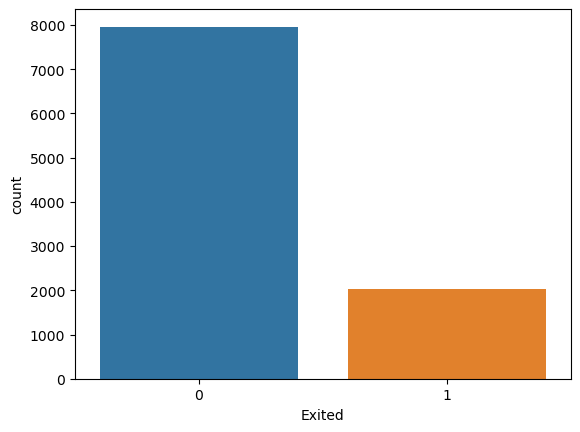

In [54]:
## Checking if the dataset is balanced
sns.countplot(x='Exited',data=df)

<Axes: >

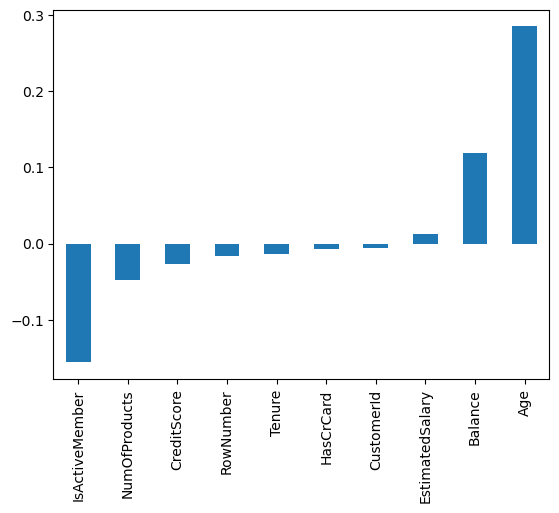

In [15]:
df.corr()['Exited'].drop('Exited').sort_values().plot(kind='bar')

In [16]:
## EDA

In [20]:
# Checking the relationship between CreditScore and how it will affect the churn

Text(0.5, 1.0, 'RElationship between creditscore and exit')

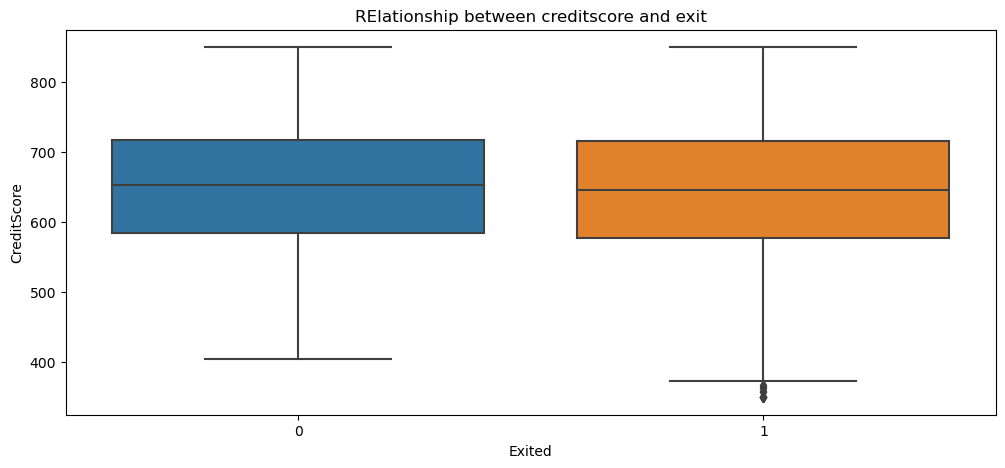

In [24]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Exited',y='CreditScore',data=df)
plt.title('RElationship between creditscore and exit')

<Axes: xlabel='Age', ylabel='CreditScore'>

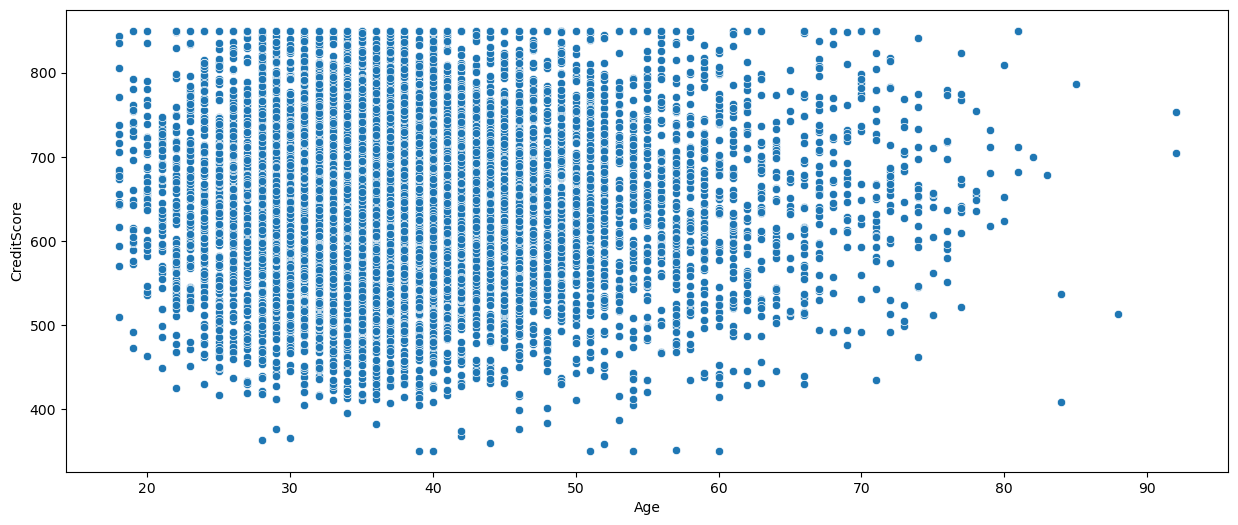

In [41]:
plt.figure(figsize=(15,6))
sns.scatterplot(y='CreditScore',
                x='Age',data=df)

(0.0, 100.0)

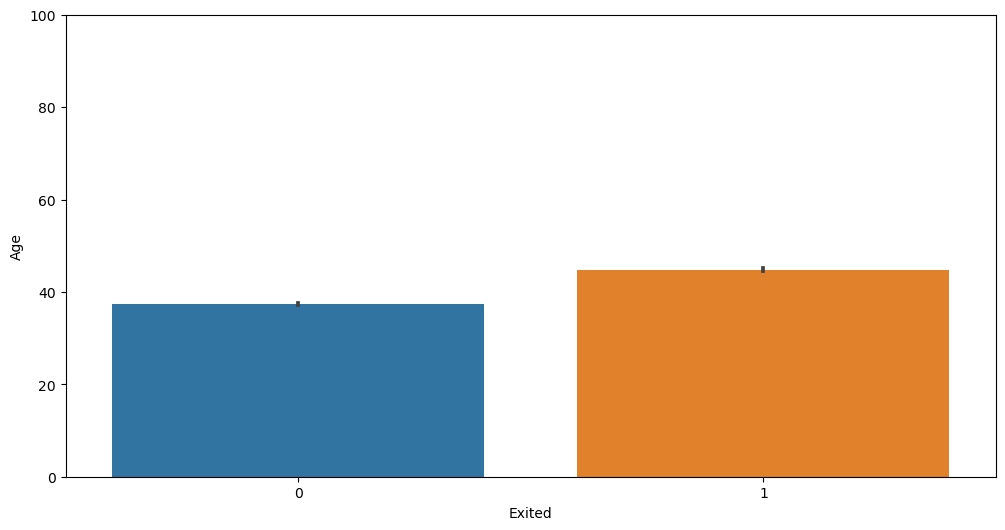

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(x='Exited',y='Age',data=df)
plt.ylim(0,100)

(0.0, 50.0)

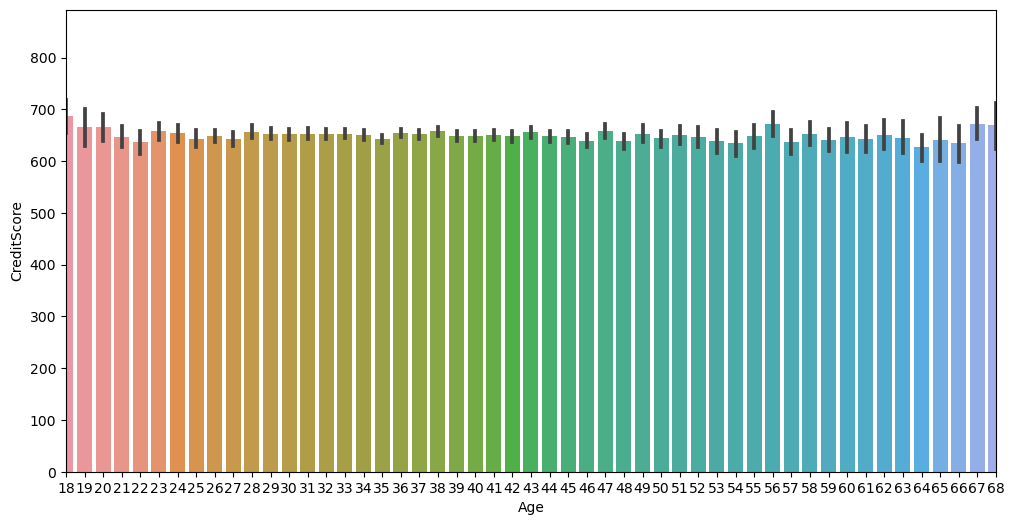

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(x='Age',y='CreditScore',data=df)
plt.xlim(0,50)

In [43]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<Axes: xlabel='Exited', ylabel='Geography'>

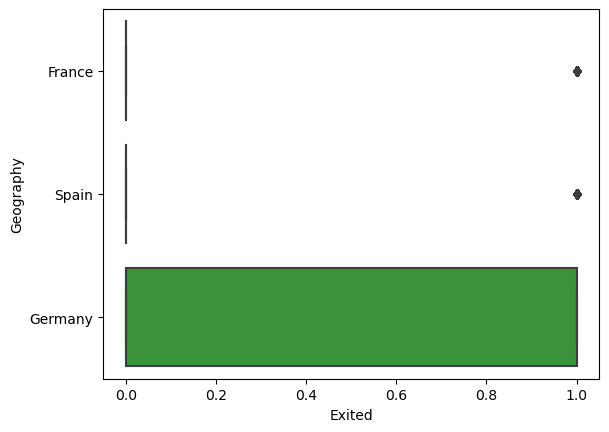

In [70]:
sns.boxplot(y='Geography',x='Exited',data=df)

Text(0.5, 0, 'Credit score')

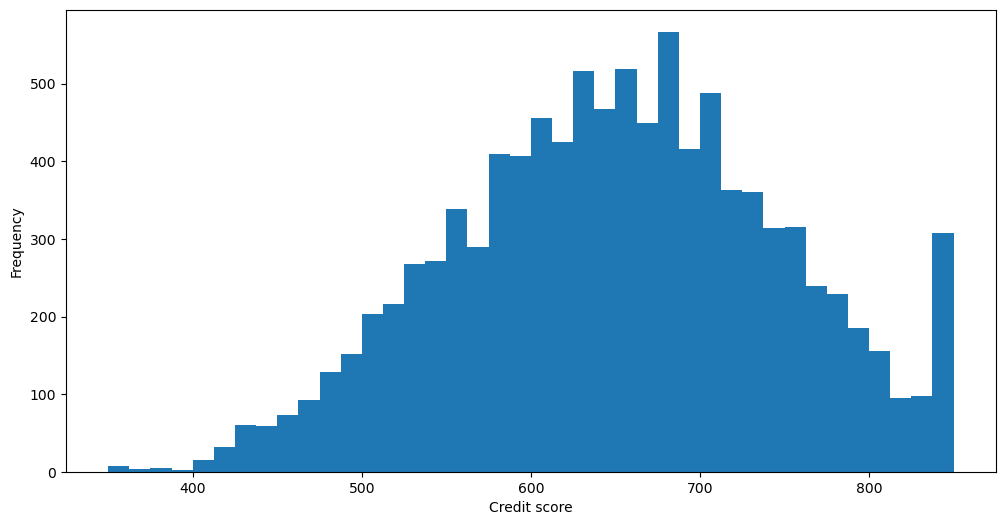

In [56]:
plt.figure(figsize=(12,6))
df['CreditScore'].plot(kind='hist',bins=40)
plt.xlabel('Credit score')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [61]:
df['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

<Axes: xlabel='Tenure', ylabel='count'>

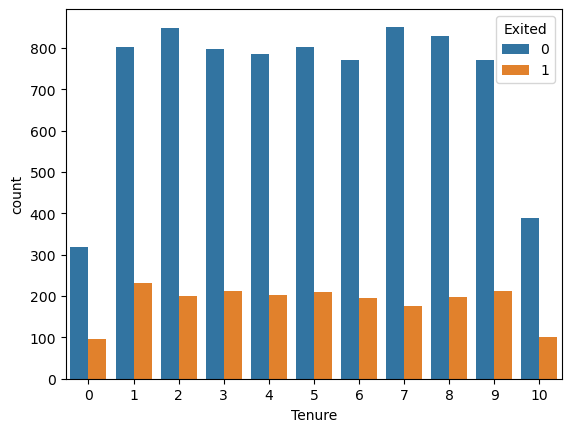

In [62]:
sns.countplot(x='Tenure',data=df,hue='Exited')

<Axes: xlabel='Exited', ylabel='count'>

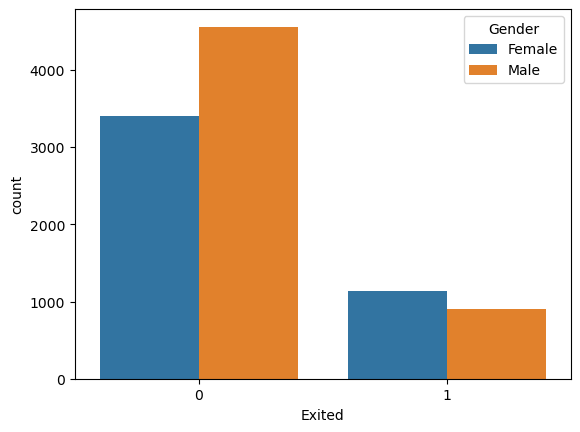

In [73]:
sns.countplot(x='Exited',data=df,hue='Gender')